/home/ccaporal/miniconda3/envs/napari-brainbow-diagnose/lib/python3.10/site-packages/napari/plugins/_plugin_manager.py:542: UserWarning: Plugin 'napari_skimage_regionprops2' has already registered a function widget 'duplicate current frame' which has now been overwritten
  warn(message=warn_message)


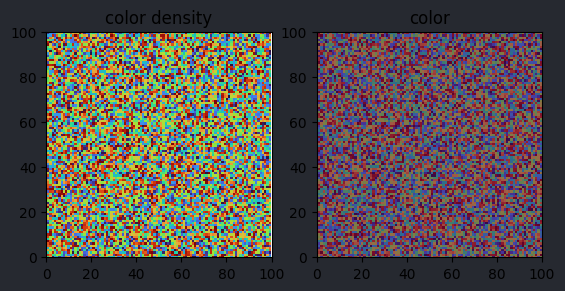

[(32.822580645161295, 54.701612903225765), (29.717741935483872, 42.72580645161287), (29.717741935483872, 40.06451612903223), (29.717741935483872, 37.40322580645159), (29.717741935483872, 35.185483870967715), (30.604838709677423, 33.41129032258061), (31.935483870967744, 31.19354838709674), (33.70967741935483, 30.306451612903203), (35.483870967741936, 29.419354838709666), (36.814516129032256, 28.97580645161287), (38.14516129032258, 28.5322580645161), (39.4758064516129, 28.5322580645161), (41.25, 27.645161290322562), (42.58064516129032, 27.645161290322562), (44.35483870967742, 27.645161290322562), (45.685483870967744, 27.645161290322562), (47.903225806451616, 28.5322580645161), (49.233870967741936, 28.97580645161287), (50.564516129032256, 29.419354838709666), (51.45161290322581, 29.862903225806434), (51.89516129032258, 30.306451612903203), (52.78225806451613, 31.19354838709674), (53.2258064516129, 32.080645161290306), (53.66935483870968, 32.96774193548384), (54.11290322580645, 33.85483870

In [39]:
#https://stackoverflow.com/questions/29701169/how-to-get-array-of-region-drawn-with-lasso-selector

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import LassoSelector
from matplotlib import path
import napari
from matplotlib.backends.backend_qt5agg import FigureCanvas

class SelectFromDensity:
    def __init__(self) -> None:
        pass

size = 100
density_wheel = np.random.rand(size, size)
color_wheel = np.random.rand(size, size)

density_placeholder = np.zeros_like(density_wheel)
color_placeholder = np.zeros_like(density_wheel)

fig = plt.figure()
mpl_widget = FigureCanvas(fig)
fig.set_facecolor("#262930")

ax1 = fig.add_subplot(121)
ax1.set_title('color density')
msk = ax1.imshow(density_wheel, origin='lower',vmax=1, interpolation='nearest', cmap="turbo")
msk = ax1.imshow(density_placeholder, origin='lower',vmax=1, interpolation='nearest', alpha=0.1)
ax1.set_xlim([0, size])
ax1.set_ylim([0, size])
ax1.set_aspect('equal')

# Empty array to be filled with lasso selector
ax2 = fig.add_subplot(122)
ax2.set_title('color')
msk = ax2.imshow(color_wheel, origin='lower',vmax=1, interpolation='nearest', cmap="turbo")
msk = ax2.imshow(color_placeholder, origin='lower',vmax=1, interpolation='nearest', alpha=0.5)
ax2.set_xlim([0, size])
ax2.set_ylim([0, size])

# Pixel coordinates
pix = np.arange(size)
xv, yv = np.meshgrid(pix,pix)
pix = np.vstack( (xv.flatten(), yv.flatten()) ).T

def draw_region(verts):
    global color_placeholder, pix
    p = path.Path(verts)
    ind = p.contains_points(pix, radius=1)
    color_placeholder = updateArray(color_placeholder, ind)
    msk.set_data(color_placeholder)
    fig.canvas.draw_idle()
    

def updateArray(array, indices):
    lin = np.arange(array.size)
    newArray = array.flatten()
    newArray[lin[indices]] = 1
    return newArray.reshape(array.shape)

def onselect(verts):
    print(verts)
    # global color_wheel, pix
    global color_placeholder, pix
    p = path.Path(verts)
    # color_placeholder = color_wheel.copy()
    ind = p.contains_points(pix, radius=1)
    color_placeholder = updateArray(color_placeholder, ind)
    msk.set_data(color_placeholder)
    fig.canvas.draw_idle()

lasso = LassoSelector(ax2, onselect, button=1)
lasso2 = LassoSelector(ax1, onselect, button=1)


viewer = napari.Viewer(ndisplay=3)
viewer.window.add_dock_widget(mpl_widget)